#### Week 11 Exercise 11.2 Author: Rex Gayas Course & Section: DSC320-T301 Math for Data Science (2243-1) Date: 25 February 2024

#### Using the Binomial Distribution

In [20]:
# Solution to 1a
from scipy.stats import binom

# Given values
n_models = 15
individual_accuracy = 0.63

# Calculate the ensemble model accuracy
# Figure out the sum of probabilities from 8 to 15 correct models
ensemble_accuracy = sum(binom.pmf(k, n_models, individual_accuracy) for k in range(8, n_models + 1))

ensemble_accuracy


0.8512830492077245

The ensemble model, composed of 15 individual models with an accuracy of 63% each, yields an ensemble accuracy of approximately 85.13%. This calculation sums the probabilities of getting a majority of correct predictions (8 or more out of 15) using the binomial distribution.

In [21]:
# Solution to 1b
from scipy.optimize import bisect

# Define a function to calculate ensemble accuracy for a given individual model accuracy
def ensemble_accuracy(individual_accuracy, n_models=15, threshold=0.95):
    # Calculate the probability of the ensemble being correct, which is the sum of
    # probabilities from (n_models/2 + 1) to n_models for correct individual predictions
    return sum(binom.pmf(k, n_models, individual_accuracy) for k in range(int(n_models/2) + 1, n_models + 1)) - threshold

# Find the smallest accuracy such that the ensemble accuracy is at least 95%
# Use a binary search method to find the root of the ensemble_accuracy function.
individual_accuracy_needed = bisect(lambda p: ensemble_accuracy(p), 0.5, 1.0)

# Convert to percentage and round up to the next whole number
individual_accuracy_needed_percent = int(100 * individual_accuracy_needed) + 1

individual_accuracy_needed_percent


71

The accuracy of the 15 individual models would need to be at least 71% for the ensemble model to have at least a 95% accuracy. This is the smallest whole number percentage that satisfies the condition, as calculated using the binomial distribution and finding the root where the ensemble accuracy reaches the threshold.

In [22]:
# Solution to 1c
# Find the smallest odd number of models needed for an ensemble model
# to have at least 95% accuracy, given each model has 63% accuracy.

# Define a function to find the minimum number of models needed for the desired accuracy
def find_min_models_for_accuracy(individual_accuracy, desired_accuracy, start_n=3, increment=2):
    # Start with the smallest odd number of models
    n_models = start_n
    while True:
        # Calculate the ensemble accuracy for the current number of models
        current_accuracy = sum(binom.pmf(k, n_models, individual_accuracy) for k in range(int(n_models/2) + 1, n_models + 1))
        # If the current accuracy meets or exceeds the desired accuracy, return the number of models
        if current_accuracy >= desired_accuracy:
            return n_models
        # Increment the number of models by 2 so odd number count is maintained
        n_models += increment

# Individual model accuracy
individual_accuracy = 0.63
# Target ensemble accuracy
desired_ensemble_accuracy = 0.95

# Find the smallest odd number of models needed
min_models_needed = find_min_models_for_accuracy(individual_accuracy, desired_ensemble_accuracy)

min_models_needed


39

To achieve an ensemble accuracy of at least 95% with individual models having an accuracy of 63%, the minimum odd number of models required is 39. This ensures that there is a clear majority in the voting process of the ensemble model.

#### Working with Random Data

In [23]:
# Solution to 2a
import numpy as np

# Define a new pmf for X with different values
# Ensuring the probabilities sum up to 1
values = np.array([1, 2, 3, 4, 5])
probabilities = np.array([0.15, 0.25, 0.20, 0.15, 0.25])

# Validate if it's a proper pmf (probabilities sum up to 1)
is_valid_pmf = np.isclose(probabilities.sum(), 1)

values, probabilities, is_valid_pmf


(array([1, 2, 3, 4, 5]), array([0.15, 0.25, 0.2 , 0.15, 0.25]), True)

This distribution is valid because the sum of the probabilities is 1. It represents a scenario where the probabilities are not uniform, with values 2 and 5 having higher likelihood compared to the others.

In [24]:
# Solution to 2b
# Define a function to generate 50 random values from the pmf and return the mean
def generate_mean_from_pmf(values, probabilities, n=50):
    # Generate 50 random indices based on the previous pmf
    random_indices = np.random.choice(values, size=n, p=probabilities)
    # Calculate the mean of these random values
    mean_of_values = np.mean(random_indices)
    return mean_of_values

# Generate a sample mean from the pmf
sample_mean = generate_mean_from_pmf(values, probabilities)

sample_mean


3.1

50 random values from the previously defined probability mass function have been generated with a mean of 3.1.

In [25]:
# Solution to 2c
# Define a function to run the previously defined function 1000 times
# and store the means in a list
def simulate_means(values, probabilities, simulations=1000, n=50):
    means_list = [generate_mean_from_pmf(values, probabilities, n) for _ in range(simulations)]
    return means_list

# Run the simulation
means_list = simulate_means(values, probabilities)

# Show the first 10 means as a sample
means_list[:10]


[3.22, 3.48, 3.16, 3.1, 3.26, 2.84, 2.74, 2.96, 3.38, 3.28]

A function has been implemented to simulate the generation of 50 random values from the pmf 1,000 times and calculate their means. The first 10 sample means from this simulation are listed above.

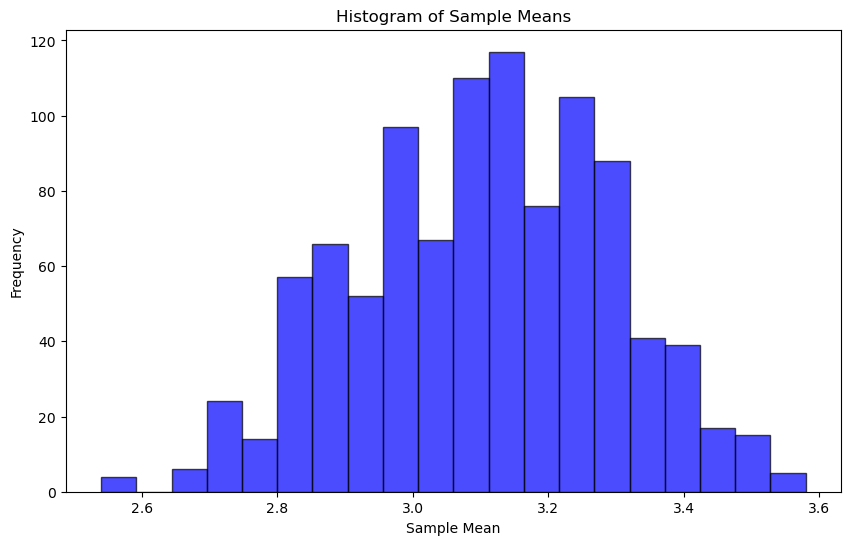

In [26]:
# Solution to 2d
import matplotlib.pyplot as plt

# Create a histogram of the means from the simulation in 2(c)
plt.figure(figsize=(10, 6))
plt.hist(means_list, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

# Display the histogram
plt.show()


Above is the histogram of the sample means from the 1,000 simulations. The histogram appears to be normally distributed, which aligns with the Central Limit Theorem (CLT). The CLT states that the distribution of sample means will tend to be normal regardless of the shape of the population distribution, provided the sample size is large enough.

In [27]:
# Solution to 2e
# Calculate the mean and standard deviation of the list of means
mean_of_means = np.mean(means_list)
std_of_means = np.std(means_list)

# Theoretical mean and standard deviation of the original distribution
theoretical_mean = np.sum(values * probabilities)
# The standard deviation of a distribution is the square root of its variance
theoretical_variance = np.sum(((values - theoretical_mean)**2) * probabilities)
theoretical_std = np.sqrt(theoretical_variance)

mean_of_means, std_of_means, theoretical_mean, theoretical_std


(3.1037199999999996, 0.1889628577260621, 3.1, 1.4106735979665883)

The mean of the list of means from the 1,000 simulations is approximately 3.104, and the standard deviation is about 0.1890. The theoretical values, based on the original pmf, are a mean of 3.1 and a standard deviation of approximately 1.411.

The observed mean of the sample means is very close to the theoretical mean, which is expected according to the Law of Large Numbers. The Law states that as the number of trials increases, the average of the outcomes will converge to the expected value. The standard deviation of the sample means is lower than the population's, which illustrates the concept of standard error decreasing as sample size increases